# Physics of Cosmic Structures: week 6 exercises
## Physics of the CMB

### II. CMB and New Physics

In [60]:
import sys,platform,os

import matplotlib
from matplotlib import pyplot as plt
import numpy as np

_camb_path = os.path.join(os.path.dirname(os.path.dirname(os.path.abspath('.'))), 'CAMB')
sys.path.insert(0,_camb_path)

import camb
print('Using CAMB %s installed at %s' %(camb.__version__,os.path.dirname(camb.__file__)))

from camb.symbolic import *

import pandas as pd

Using CAMB 1.5.4 installed at /Users/marigalla/AstroCosmoComputational/Students/MariaLuisaGallavotti/CAMB/camb


In [61]:
pars=camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')

# Enable tensor modes
pars.WantTensors = True

file_path='./Planck_data.txt'
data=pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['l', 'Dl', '-dDl', '+dDl'])

/var/folders/zj/ynn451w51tl8mfxzn0g716qr0000gn/T/ipykernel_52165/207800621.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data=pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['l', 'Dl', '-dDl', '+dDl'])


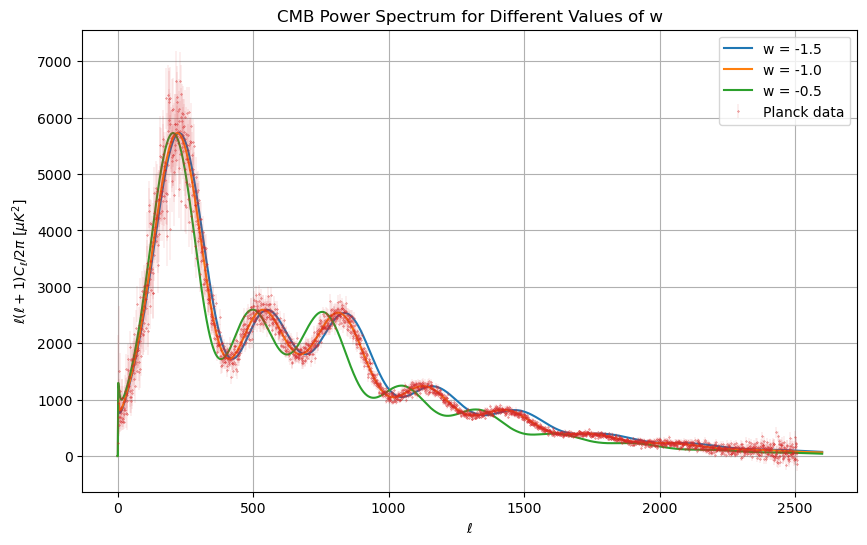

In [62]:
#function to compute CMB power spectrum for a given value of w
def get_cmb_spectrum(w):
    #setting the value of w in the parameters
    pars.DarkEnergy.set_params(w=w)
    
    results = camb.get_results(pars)
    
    powers = results.get_cmb_power_spectra(pars, CMB_unit='muK')
    cmb = powers['total']
    
    return np.arange(cmb.shape[0]), cmb[:, 0]

#values of w
ws = [-1.5, -1.0, -0.5]

#CMB power spectra for each w
ell_values = []
spectra = []
for w in ws:
    ell, spectrum = get_cmb_spectrum(w)
    ell_values.append(ell)
    spectra.append(spectrum)

#plot
plt.figure(figsize=(10, 6))
for i, w in enumerate(ws):
    plt.plot(ell_values[i], spectra[i], label=f'w = {w}')

#lanck data
plt.errorbar(data['l'], data['Dl'], yerr=[data['-dDl'], data['+dDl']], fmt='o', label='Planck data', linewidth=0.1, markersize=0.3)

plt.xlabel(r'$\ell$')
plt.ylabel(r'$\ell(\ell+1)C_\ell/2\pi$ [$\mu K^2$]')
plt.title('CMB Power Spectrum for Different Values of w')
plt.legend()
plt.grid(True)
plt.show()

### Observations

When varying the equation of state parameter $w$ of dark energy around its $\Lambda CDM$ value ($w = -1$), the CMB power spectrum shows shifts:

* **a shift to the left for $w > -1$**:
   - this means that the acoustic peaks occur at smaller angular scales (namely, higher $\ell$ values) compared to $\Lambda CDM$;
   - this effect implies that dark energy causes a slightly faster expansion of the universe over time, so that sound waves travel farther before freezing at recombination, resulting in smaller scales for the acoustic peaks;

* **a shift to the right for $w < -1$**:
   - the acoustic peaks occur at larger angular scales (lower $\ell$ values) compared to $\Lambda CDM$;
   - dark energy with $w < -1$ has a more negative pressure than a cosmological constant, and this slower expansion causes sound waves to freeze earlier in the universe's history, resulting in larger angular scales for the acoustic peaks.

In [63]:
# Calculate chi-square for each w
def compute_chi_squared(w, ell_values, spectra, data):
    chi_squared = []
    for i, ell in enumerate(ell_values):
        theory_interp = np.interp(data['l'], ell, spectra[i])
        chi_sq = np.sum(((theory_interp - data['Dl']) / data['-dDl'])**2)
        chi_squared.append(chi_sq)
    return chi_squared

# Compute and print chi-square values
chi_squared_values = compute_chi_squared(ws, ell_values, spectra, data)
for i, w in enumerate(ws):
    print(f'w = {w}: Chi-square = {chi_squared_values[i]}')

w = -1.5: Chi-square = 9210.42148989124
w = -1.0: Chi-square = 2617.959699690983
w = -0.5: Chi-square = 28359.501217730503


### Interpretation
Even if among the tested values, $w = -1.0$ has the lowest $\chi^2$ value (which indicates that theoretical predictions match the observed Planck data relatively well), $w = -1.5$ has a lower $\chi^2$ value compared to $w = -0.5$, suggesting a better agreement between the theoretical CMB power spectrum and the observed Planck data, namely that $w = -1.5$ provides a preferable choice within the context of the cosmological model tested.